In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile as zf

from matplotlib import rcParams
from nltk.corpus import stopwords

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'times new roman'

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [20]:
df = pd.read_csv('../data/tidy-words.csv', encoding='latin1')

### Top 10 high energy words and top 10 low energy words

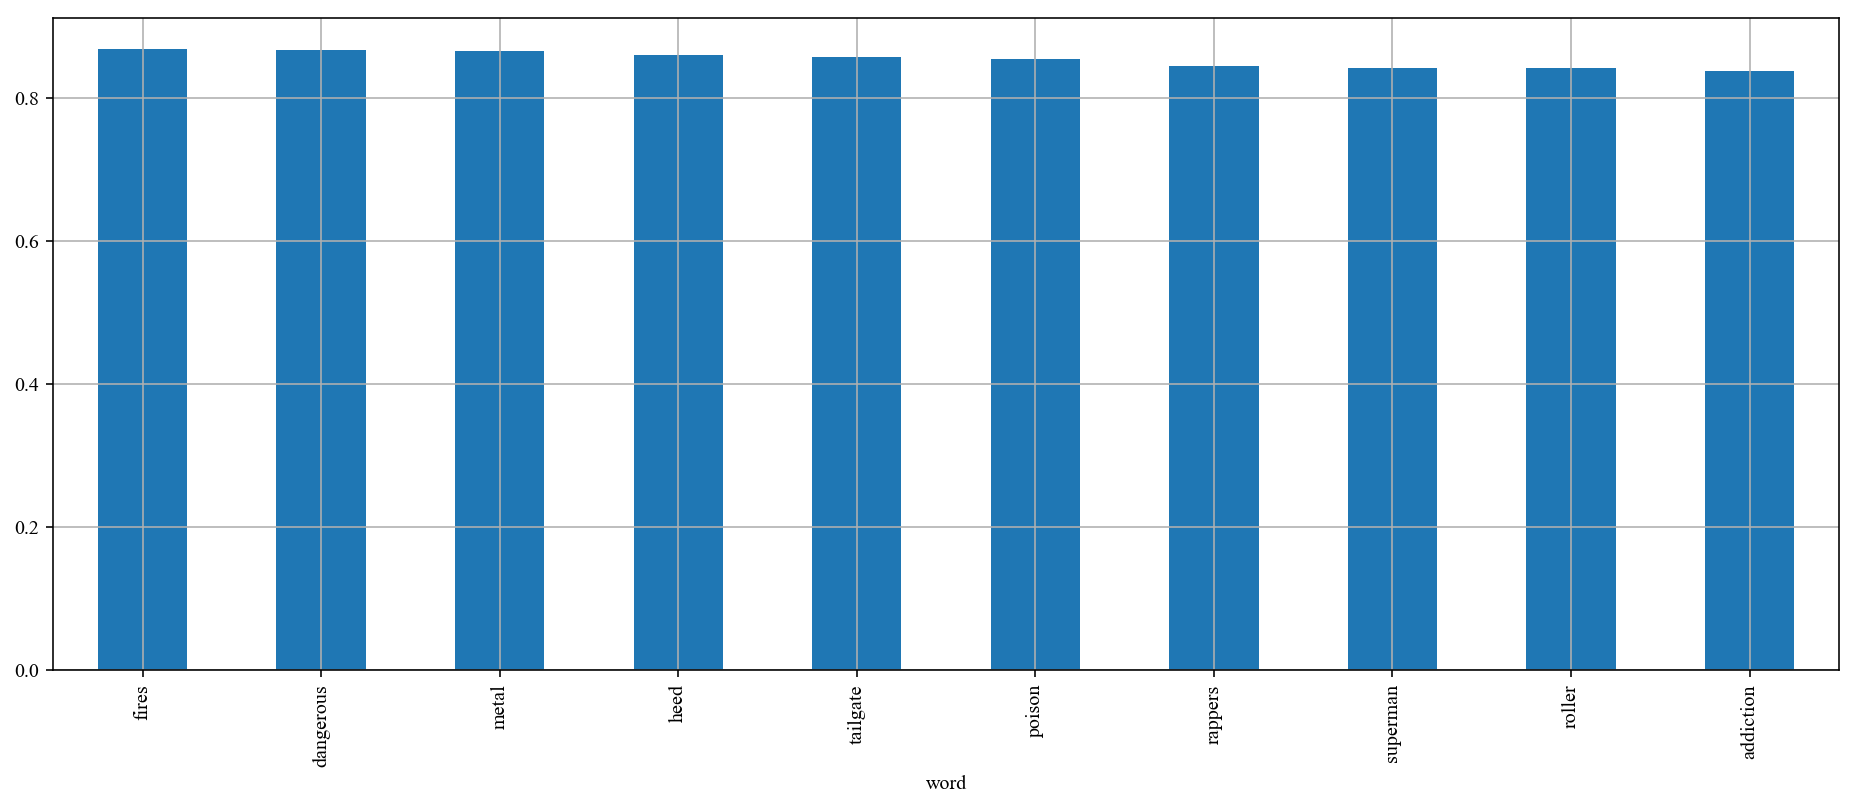

In [46]:
word_energy = df.groupby('word')['energy'].median().sort_values(ascending=False)
word_energy.head(10).plot.bar(figsize=(16,6), grid=True)

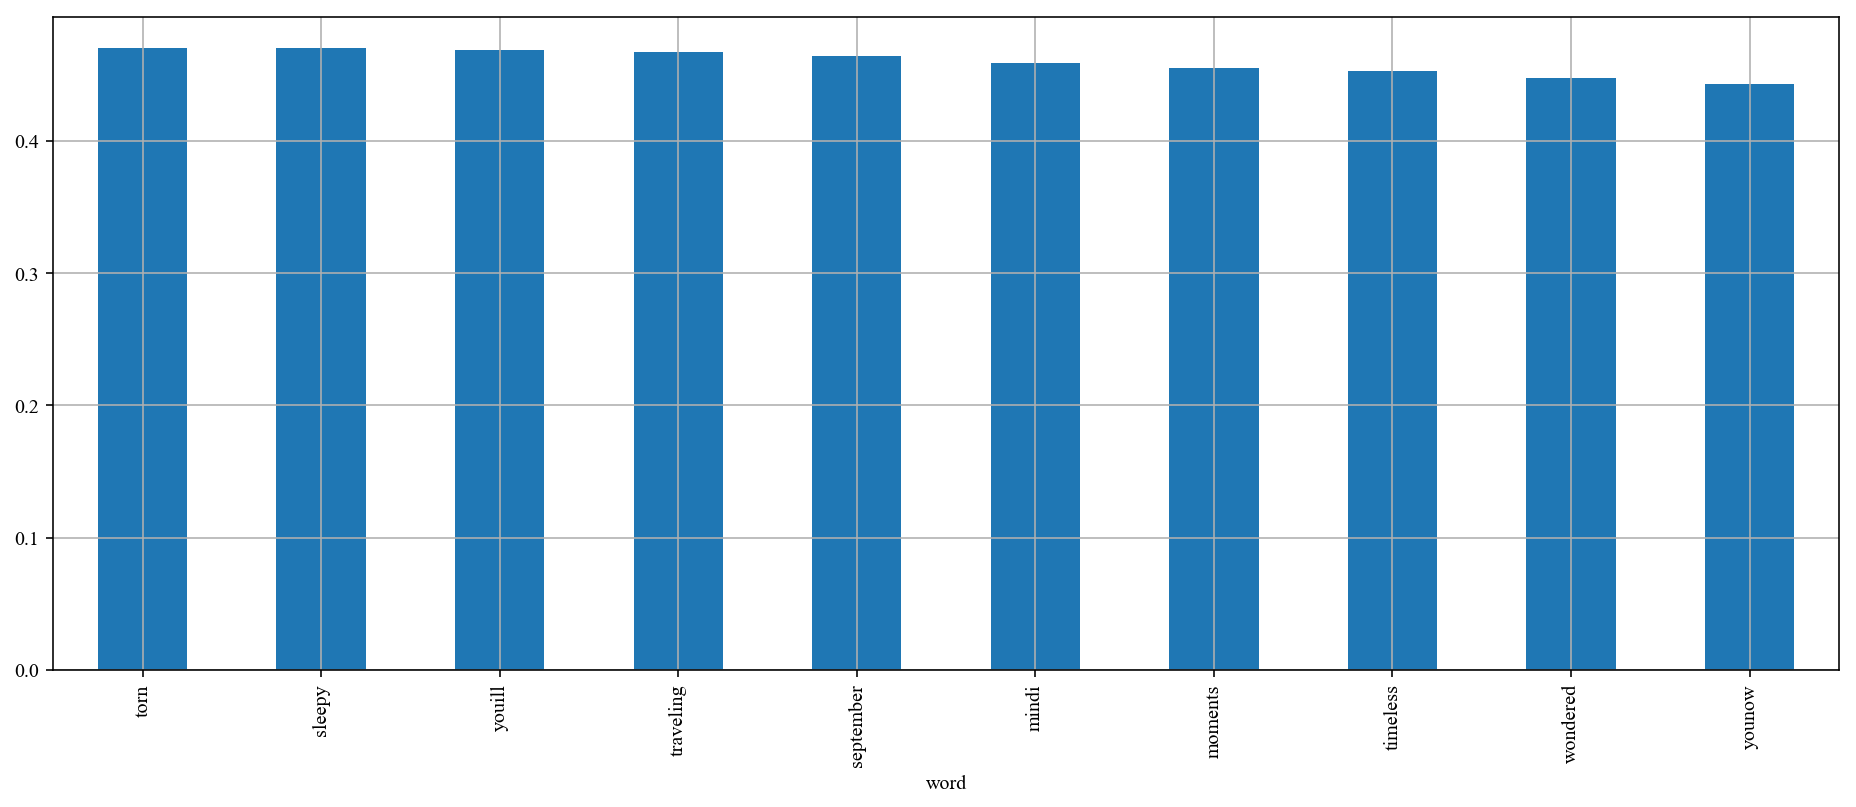

In [47]:
word_energy.tail(10).plot.bar(figsize=(16,6), grid=True)

### Top and bottom 10 words by danceability

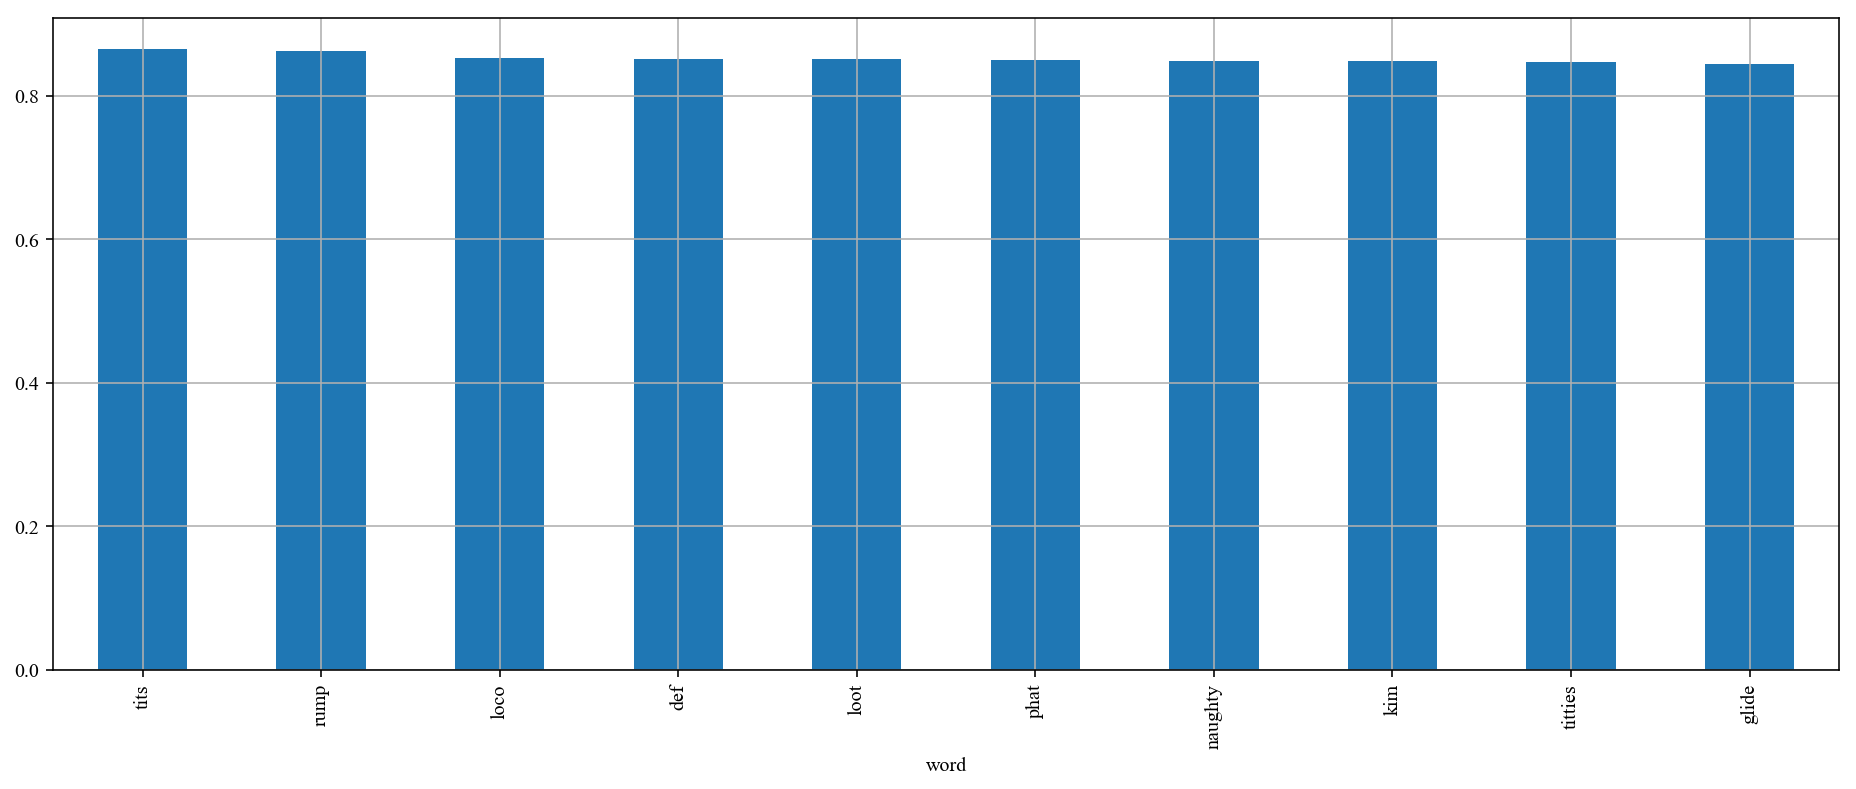

In [59]:
word_danceability = df.groupby('word') \
    ['danceability'].median().sort_values(ascending=False)
word_danceability.head(10).plot.bar(figsize=(16,6), grid=True)

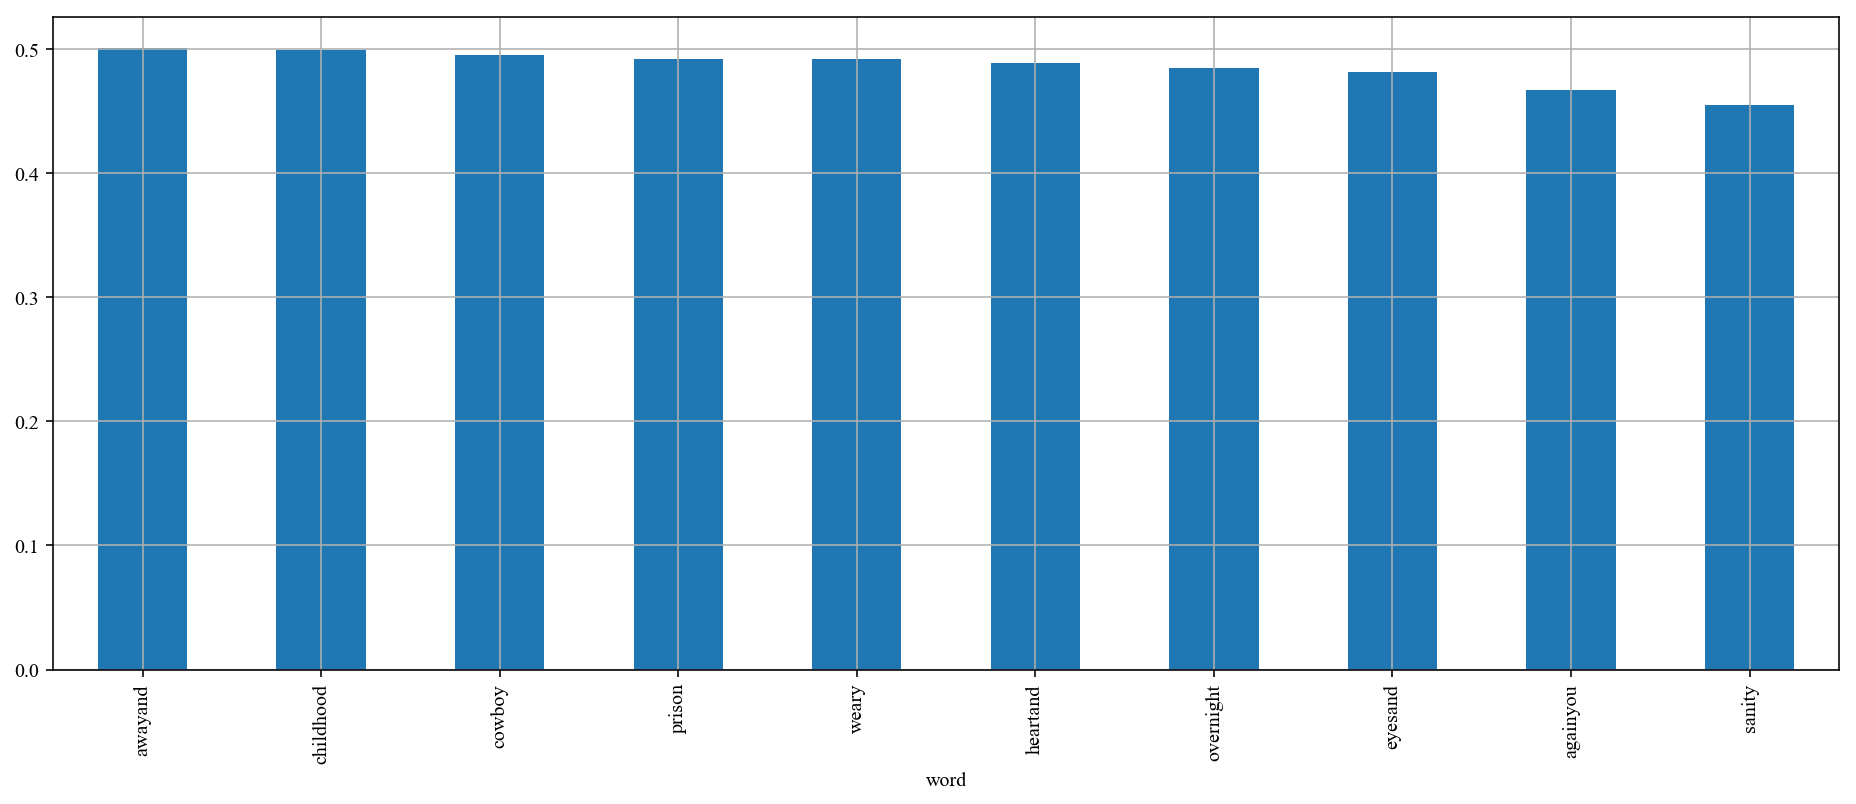

In [58]:
word_danceability.tail(10).plot.bar(figsize=(16,6), grid=True)

### Top 10 words by explicitness

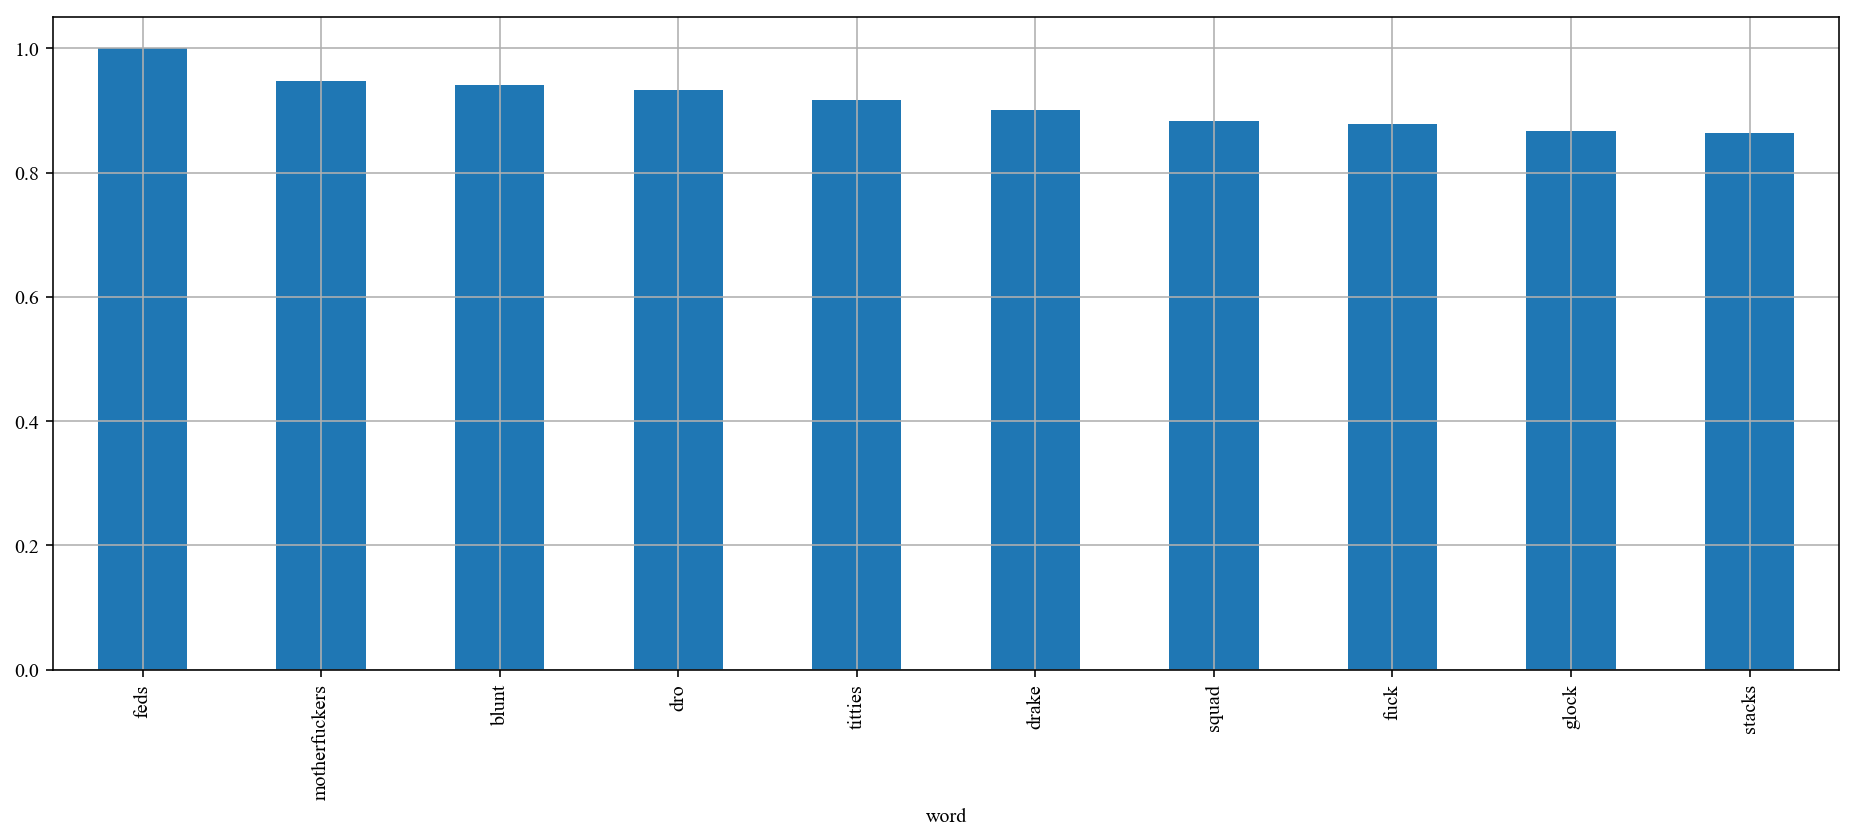

In [61]:
word_explicit = df.groupby('word') \
    ['explicit'].mean().sort_values(ascending=False)
word_explicit.head(10).plot.bar(figsize=(16,6), grid=True)

### Top and bottom 10 words by loudness

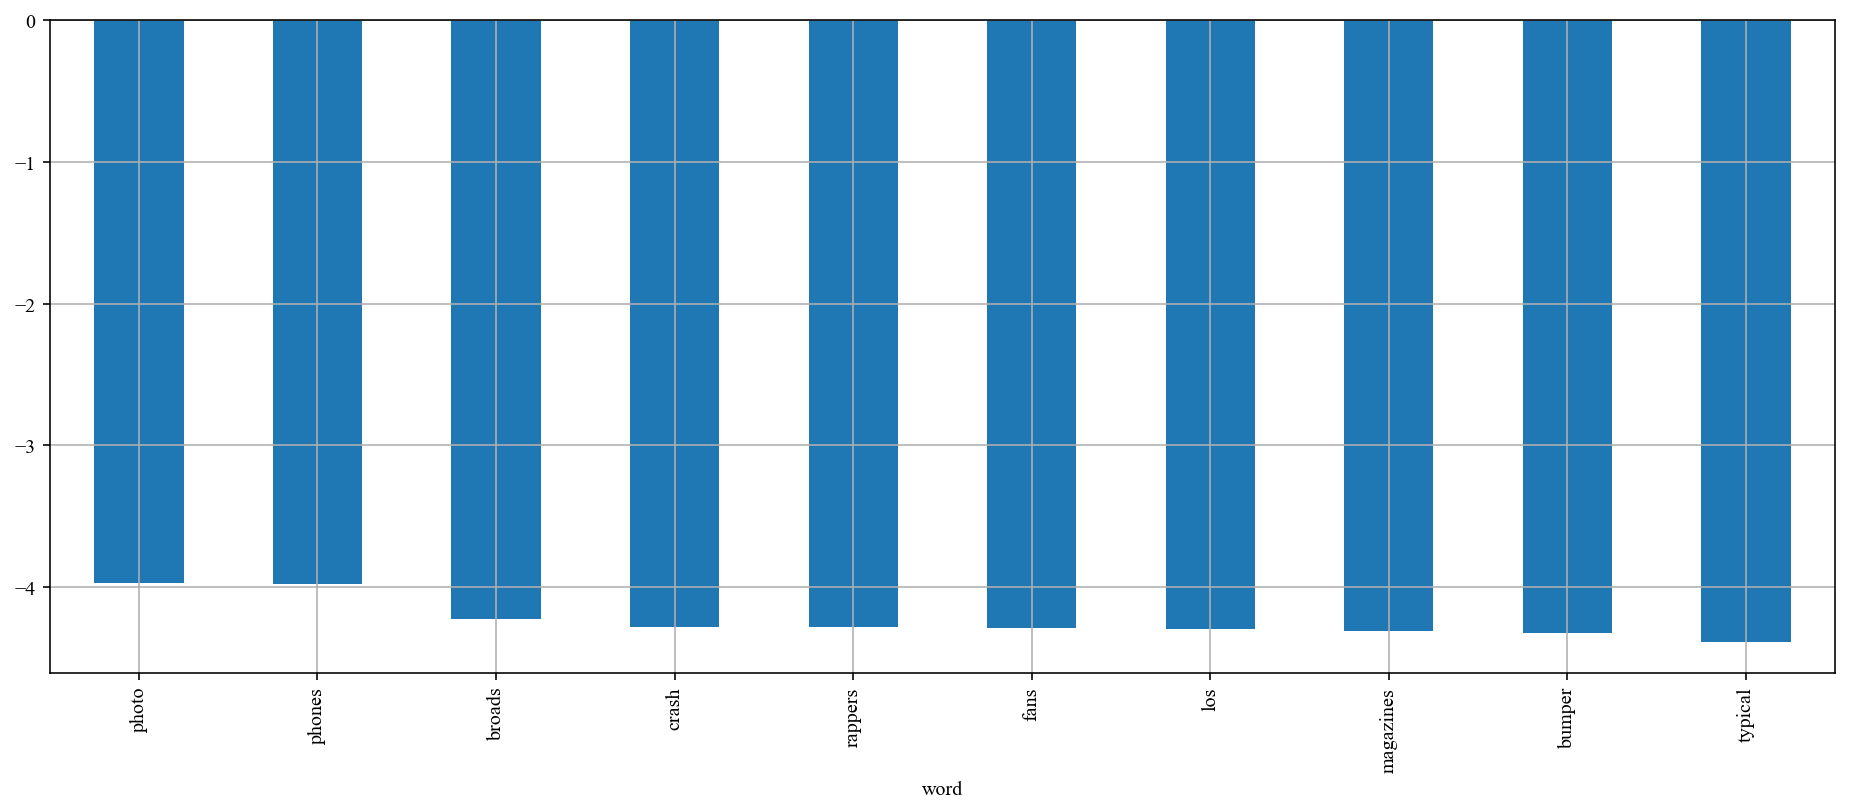

In [80]:
word_loudness = df.groupby('word') \
    ['loudness'].median().sort_values(ascending=False)
word_loudness.head(10).plot.bar(figsize=(16,6), grid=True)

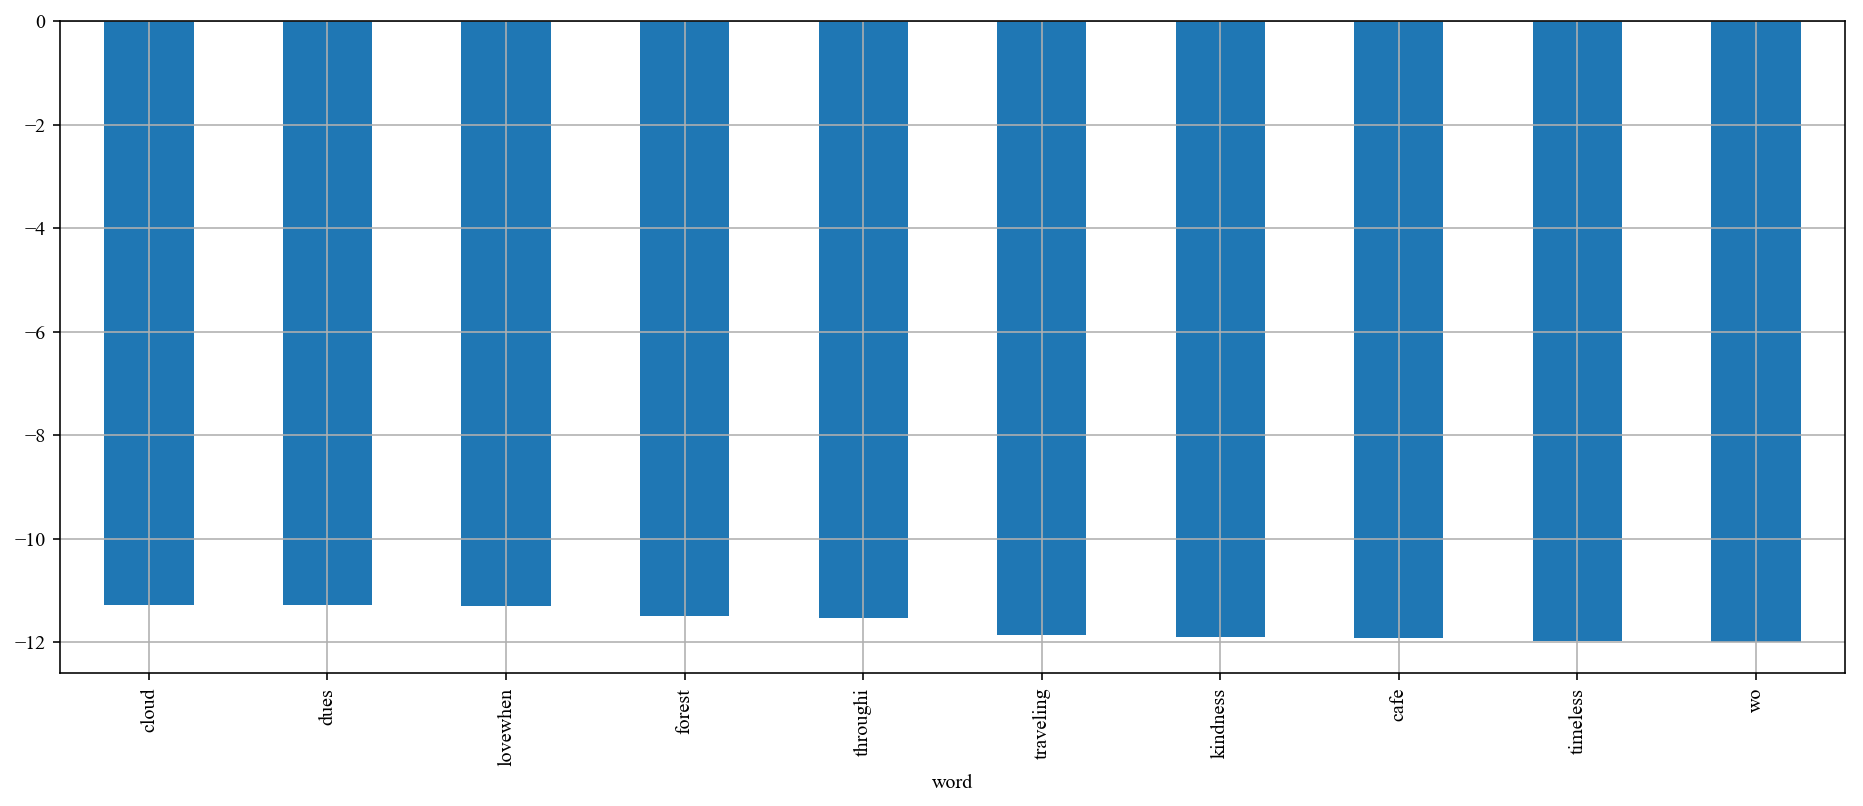

In [81]:
word_loudness.tail(10).plot.bar(figsize=(16,6), grid=True)

### Top and bottom 10 words by currency

(1964, 2016)

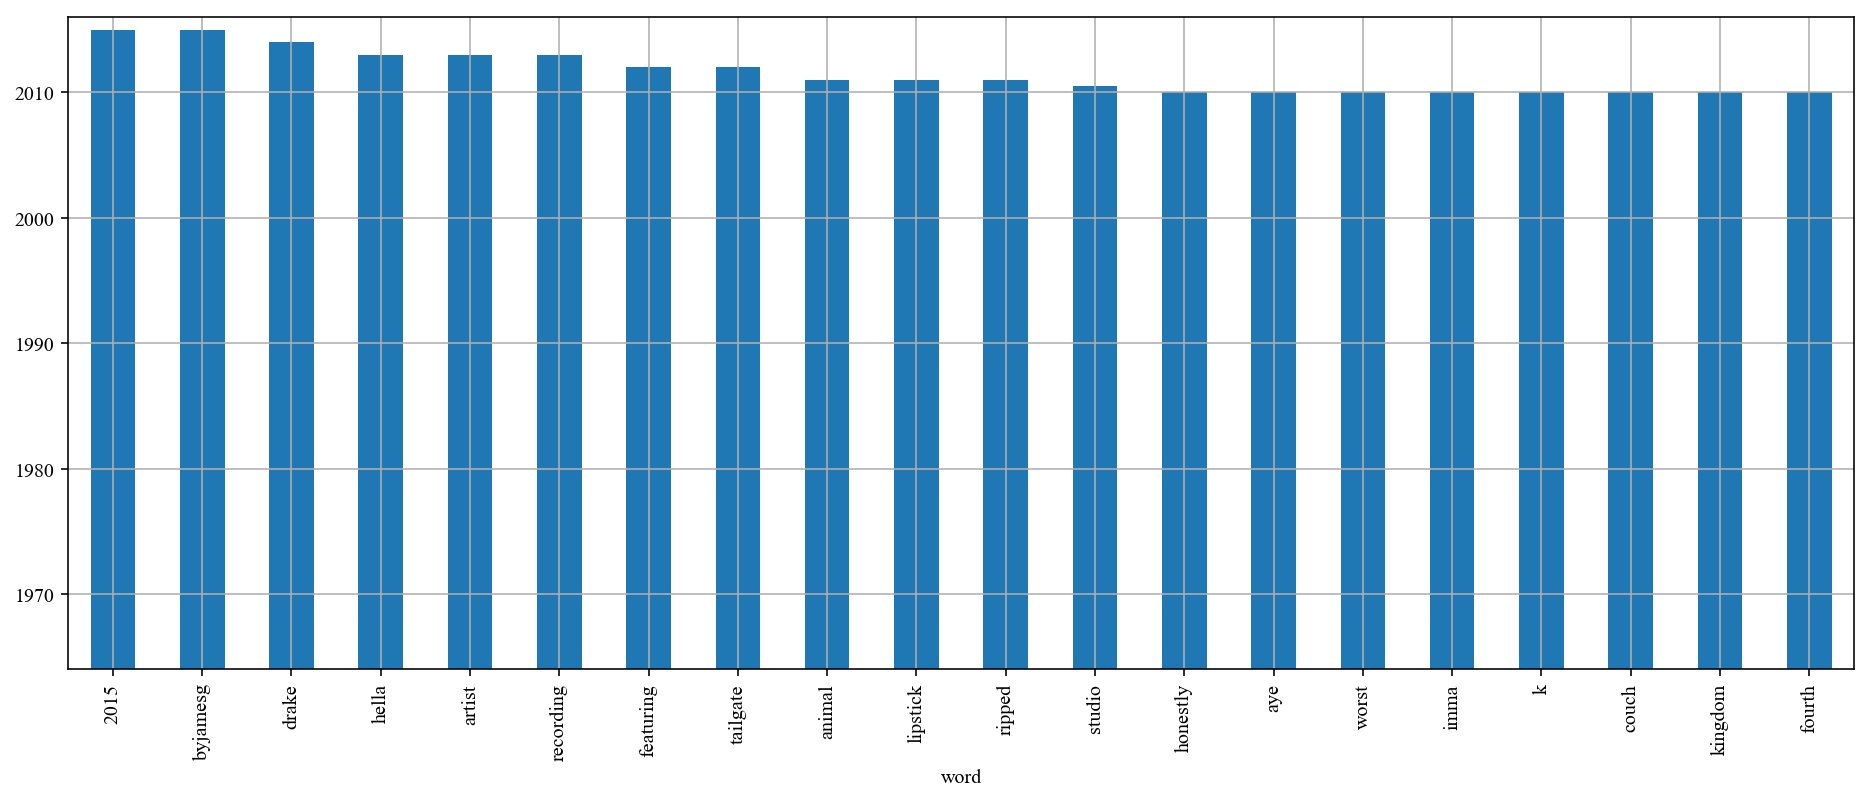

In [88]:
word_year = df.groupby('word') \
    ['year'].median().sort_values(ascending=False)
ax = word_year.head(20).plot.bar(figsize=(16,6), grid=True)
ax.set_ylim(1964, 2016)

(1964, 2016)

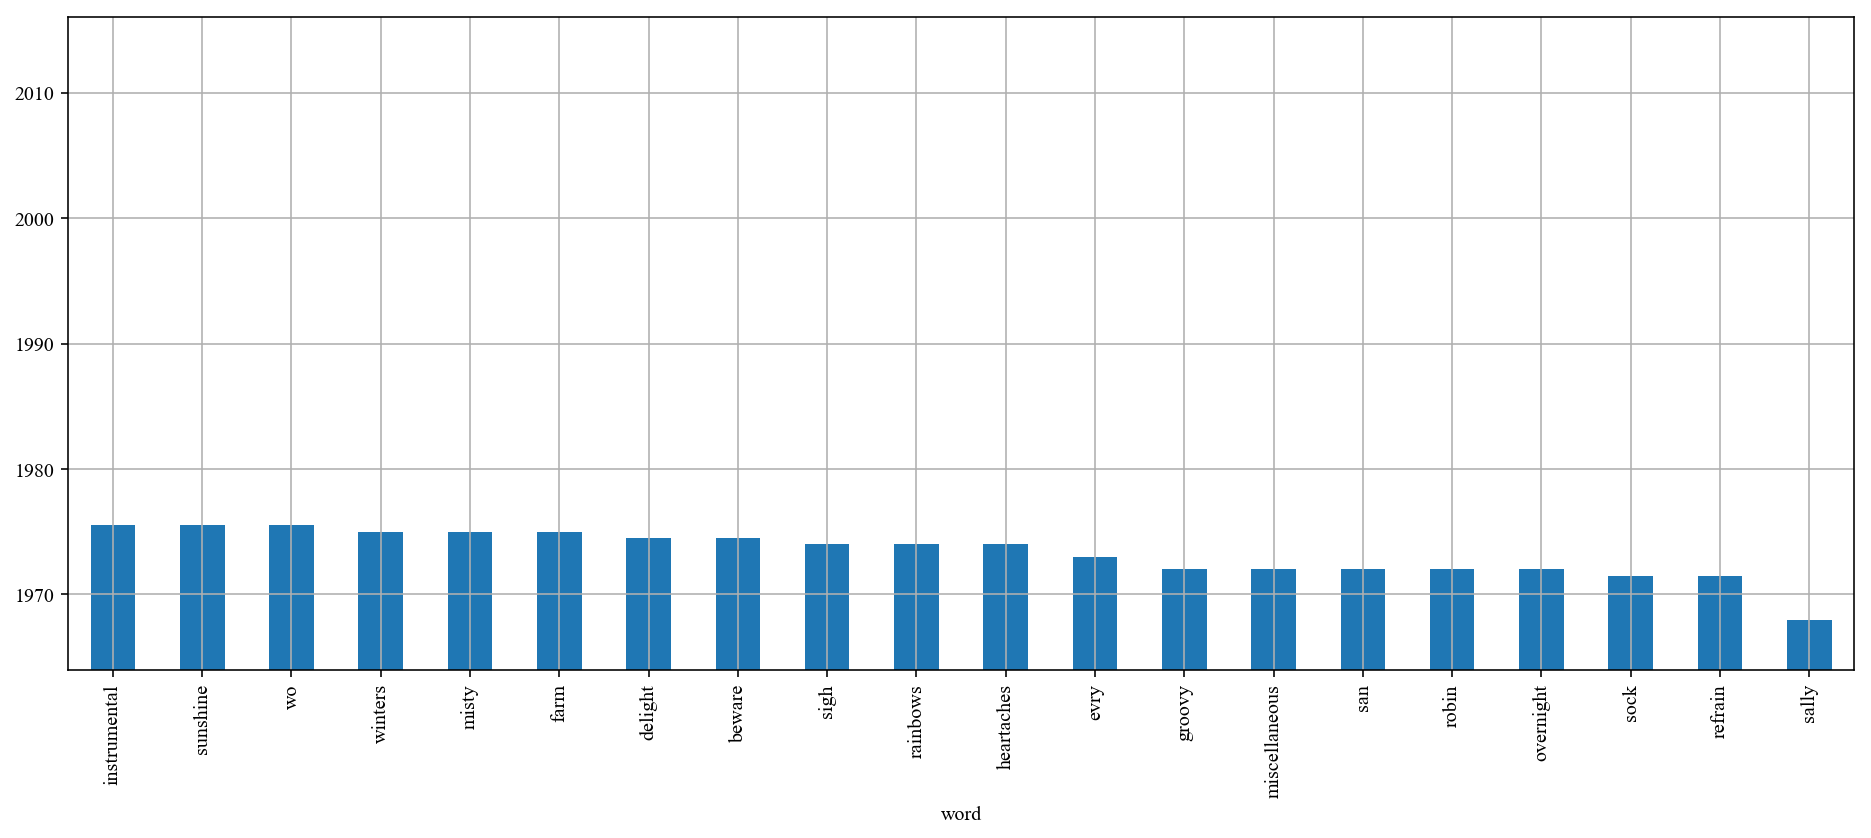

In [89]:
ax = word_year.tail(20).plot.bar(figsize=(16,6), grid=True)
ax.set_ylim(1964, 2016)

### Word frequency over time

In [164]:
stop = stopwords.words('english')
stop += ['dont', 'im', 'youre', 'ill']
mask = df['word'].apply(lambda x: x not in stop)
words_freq = df.loc[mask,:].groupby(['year','word'])['count'].sum()
wf2 = words_freq.reset_index()

More singing about girls than boys

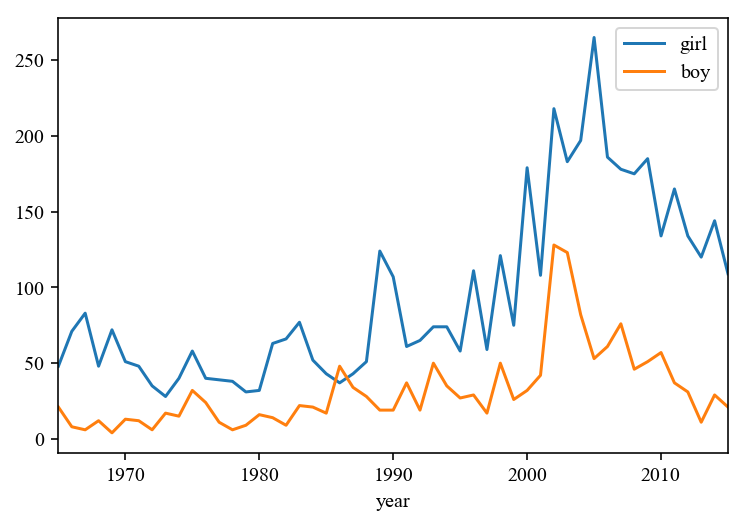

In [166]:
ax = plt.axes()
wf2[wf2['word']=='girl'].plot.line(x='year', y='count', ax=ax, label='girl')
wf2[wf2['word']=='boy'].plot.line(x='year', y='count', ax=ax, label='boy')

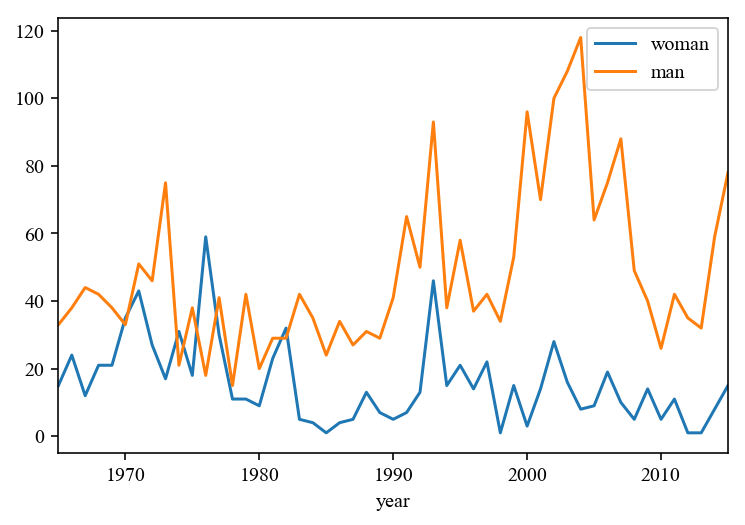

In [168]:
ax = plt.axes()
wf2[wf2['word']=='woman'].plot.line(x='year', y='count', ax=ax, label='woman')
wf2[wf2['word']=='man'].plot.line(x='year', y='count', ax=ax, label='man')

Certain explicit words evolved in popularity together.

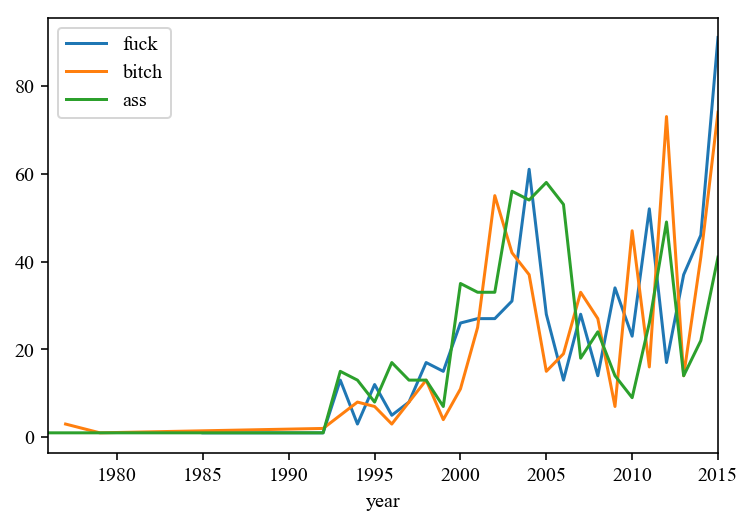

In [174]:
ax = plt.axes()
wf2[wf2['word']=='fuck'].plot.line(x='year', y='count', ax=ax, label='fuck')
wf2[wf2['word']=='bitch'].plot.line(x='year', y='count', ax=ax, label='bitch')
wf2[wf2['word']=='ass'].plot.line(x='year', y='count', ax=ax, label='ass')

Love is forever. Like is a verbal tick.

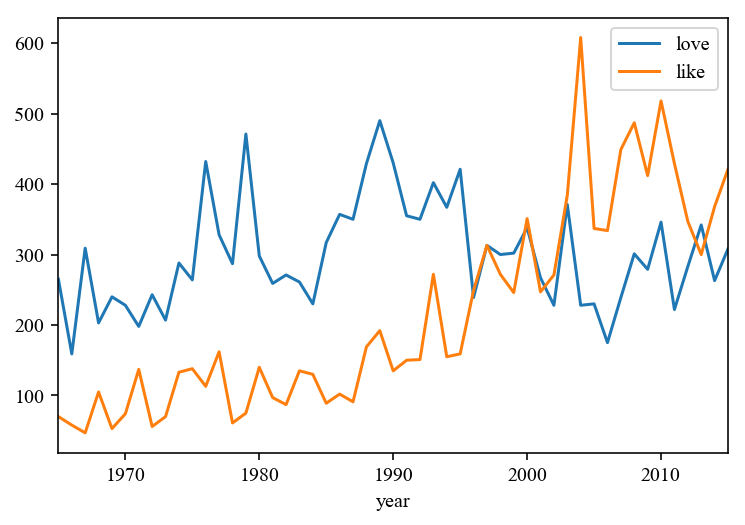

In [180]:
ax = plt.axes()
wf2[wf2['word']=='love'].plot.line(x='year', y='count', ax=ax, label='love')
wf2[wf2['word']=='like'].plot.line(x='year', y='count', ax=ax, label='like')

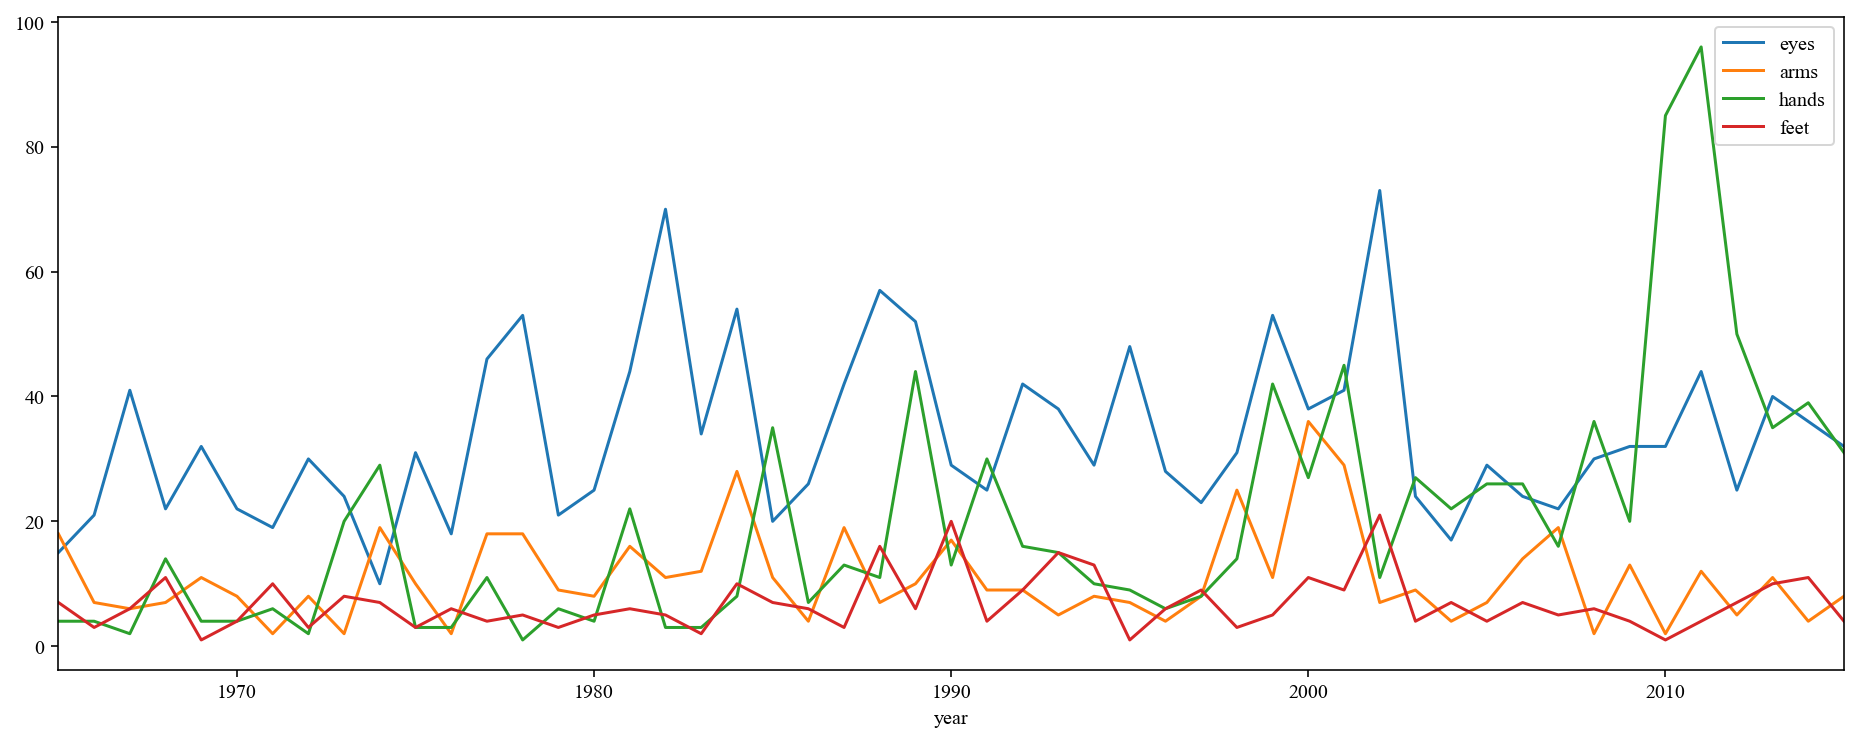

In [254]:
plt.figure(figsize=(16,6))
ax = plt.axes()
wf2[wf2['word']=='eyes'].plot.line(x='year', y='count', ax=ax, label='eyes')
wf2[wf2['word']=='arms'].plot.line(x='year', y='count', ax=ax, label='arms')
wf2[wf2['word']=='hands'].plot.line(x='year', y='count', ax=ax, label='hands')
wf2[wf2['word']=='feet'].plot.line(x='year', y='count', ax=ax, label='feet')

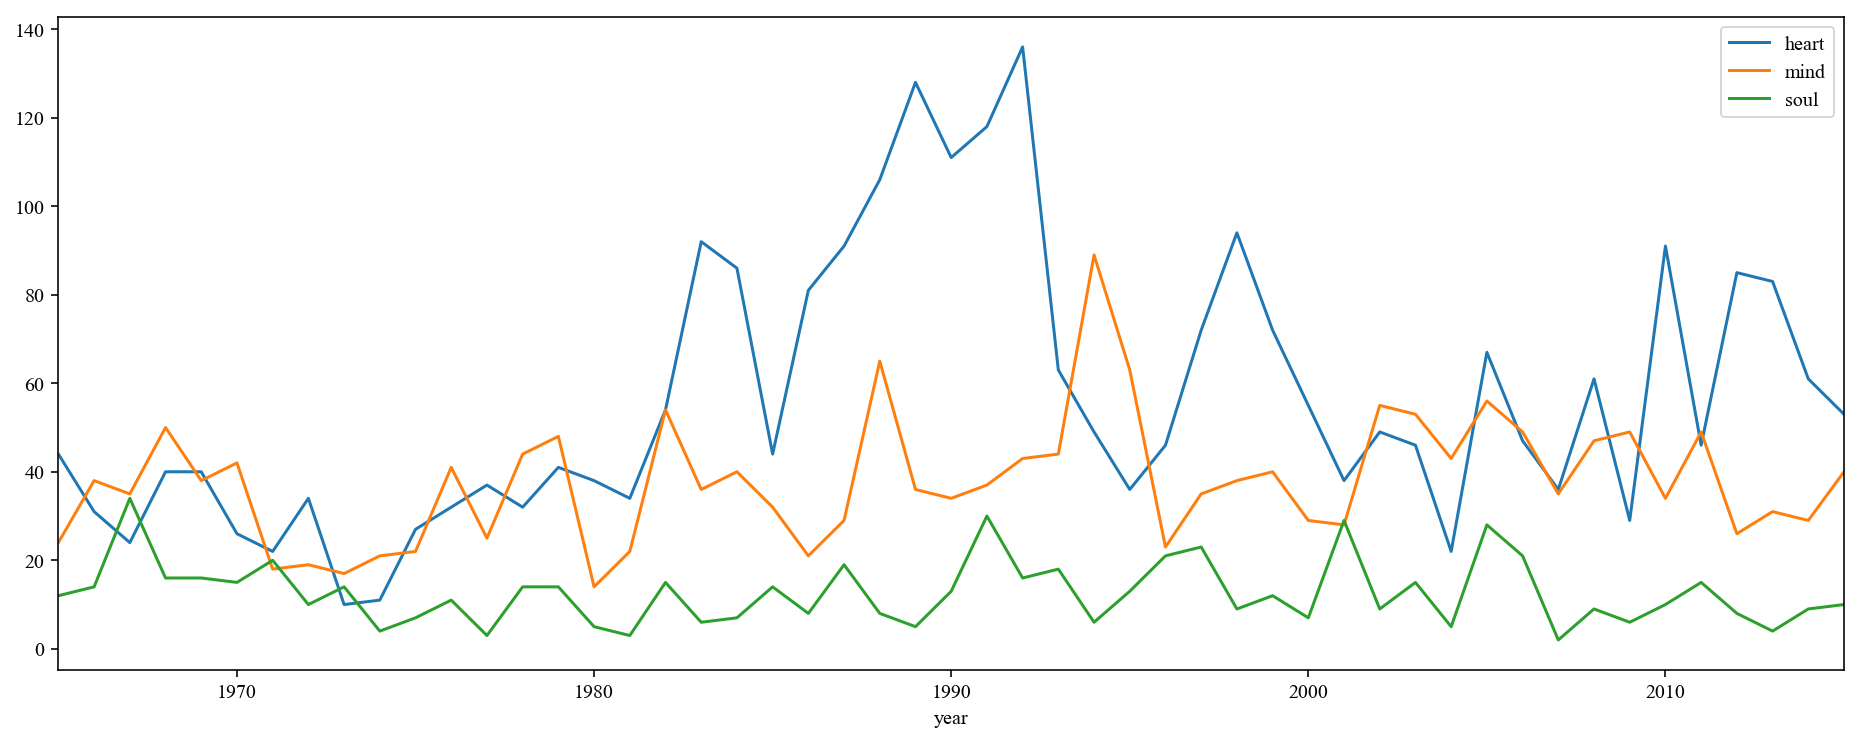

In [255]:
plt.figure(figsize=(16,6))
ax = plt.axes()
wf2[wf2['word']=='heart'].plot.line(x='year', y='count', ax=ax, label='heart')
wf2[wf2['word']=='mind'].plot.line(x='year', y='count', ax=ax, label='mind')
wf2[wf2['word']=='soul'].plot.line(x='year', y='count', ax=ax, label='soul')